In [573]:
#import libraries

In [574]:
import numpy as np

In [575]:
import pandas as pd

In [576]:
import matplotlib.pyplot as plt

In [577]:
import seaborn as sns

In [578]:
import warnings

In [579]:
warnings.filterwarnings("ignore")

In [580]:
#import dataset

In [581]:
diabetes_df = pd.read_csv(r"C:\Users\Prof Guru Joe\Downloads\diabetes.csv")

In [582]:
diabetes_df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Family History,Gender,Age(yrs),Result
0,6,148,72,35,0,33.6,0.627,Male,50,1
1,1,85,66,29,0,26.6,0.351,Male,31,0
2,8,183,64,0,0,23.3,0.672,Female,32,1
3,1,89,66,23,94,28.1,0.167,Female,21,0
4,0,137,40,35,168,43.1,2.288,Male,33,1


In [583]:
diabetes_df.shape

(768, 10)

In [584]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     768 non-null    int64  
 1   Glucose         768 non-null    int64  
 2   BP              768 non-null    int64  
 3   SkinThickness   768 non-null    int64  
 4   Insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   Family History  768 non-null    float64
 7   Gender          768 non-null    object 
 8   Age(yrs)        768 non-null    int64  
 9   Result          768 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [585]:
#summary of the dataset

In [586]:
diabetes_df.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Family History,Age(yrs),Result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [587]:
diabetes_df_features = diabetes_df[['Pregnancies','Glucose','BP','SkinThickness','Insulin','BMI','Family History',
                                 'Age(yrs)','Gender']]

                Pregnancies   Glucose        BP  SkinThickness   Insulin  \
Pregnancies        1.000000  0.129459  0.141282      -0.081672 -0.073535   
Glucose            0.129459  1.000000  0.152590       0.057328  0.331357   
BP                 0.141282  0.152590  1.000000       0.207371  0.088933   
SkinThickness     -0.081672  0.057328  0.207371       1.000000  0.436783   
Insulin           -0.073535  0.331357  0.088933       0.436783  1.000000   
BMI                0.017683  0.221071  0.281805       0.392573  0.197859   
Family History    -0.033523  0.137337  0.041265       0.183928  0.185071   
Age(yrs)           0.544341  0.263514  0.239528      -0.113970 -0.042163   

                     BMI  Family History  Age(yrs)  
Pregnancies     0.017683       -0.033523  0.544341  
Glucose         0.221071        0.137337  0.263514  
BP              0.281805        0.041265  0.239528  
SkinThickness   0.392573        0.183928 -0.113970  
Insulin         0.197859        0.185071 -0.042163

<AxesSubplot:>

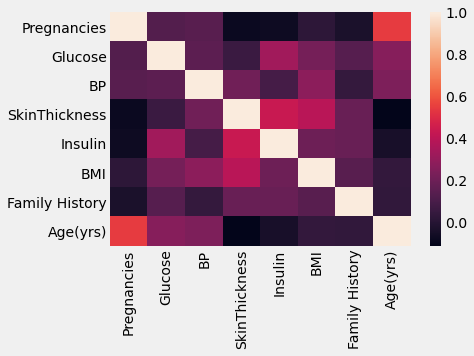

In [588]:
print(diabetes_df_features.corr())
sns.heatmap(diabetes_df_features.corr())

<AxesSubplot:>

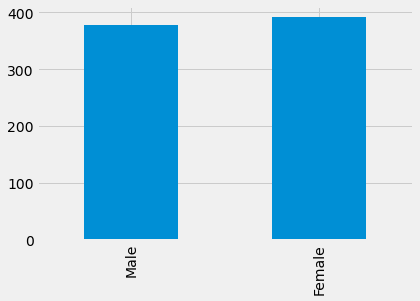

In [589]:
diabetes_df['Gender'].value_counts().sort_index(ascending=False).plot(kind='bar')

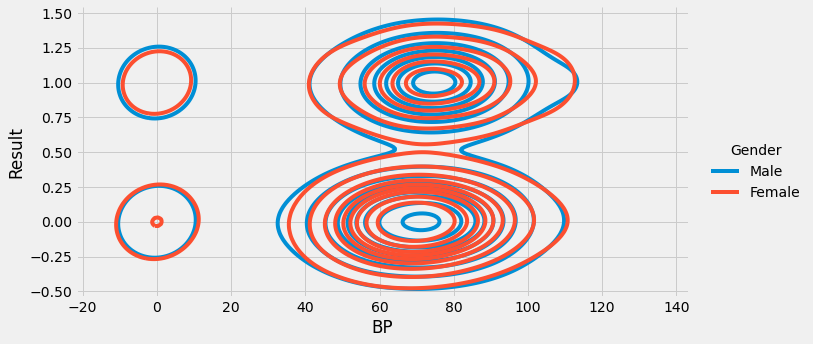

In [590]:
sns.displot(kind='kde', x= 'BP', y='Result',hue='Gender', data =diabetes_df, aspect =2);

<AxesSubplot:xlabel='Age(yrs)', ylabel='Result'>

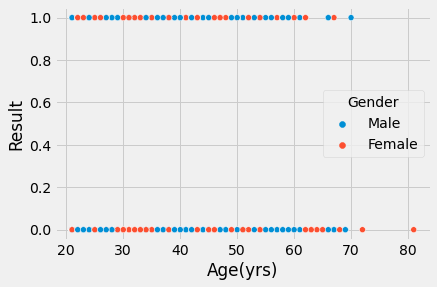

In [591]:
sns.scatterplot( x= 'Age(yrs)', y='Result',hue='Gender', data =diabetes_df)

In [592]:
# checking for missing data

In [593]:
diabetes_df.isna().sum().max()

0

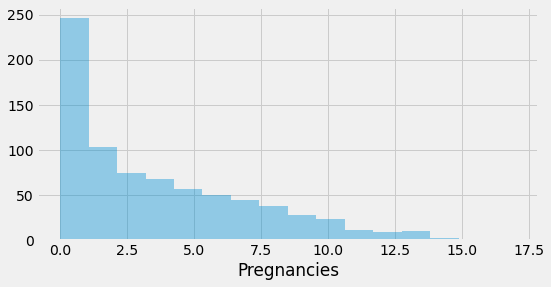

In [594]:
pregnancies = plt.subplots(figsize=(8, 4))
sns.distplot(diabetes_df.get("Pregnancies"), kde=False)
plt.show()

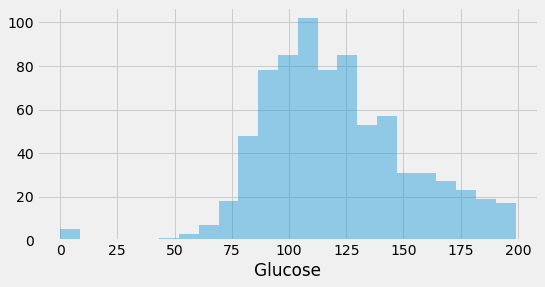

In [595]:
glucose = plt.subplots(figsize=(8, 4))
sns.distplot(diabetes_df.get("Glucose"), kde=False)
plt.show()

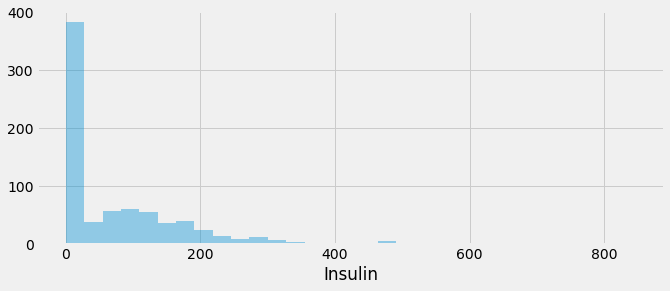

In [596]:
bp = plt.subplots(figsize=(10, 4))
sns.distplot(diabetes_df.get("Insulin"), kde=False)
plt.show()

In [597]:
X = diabetes_df.iloc[:, [1, 5]].values

In [598]:
y = diabetes_df.iloc[:, -1].values

In [599]:
# Splitting the dataset into the Training and Test set

In [600]:
from sklearn.model_selection import train_test_split

In [601]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [602]:
# Feature Scaling

In [603]:
from sklearn.preprocessing import StandardScaler

In [604]:
scale = StandardScaler()

In [605]:
X_train = scale.fit_transform(X_train)

In [606]:
X_test = scale.transform(X_test)

In [607]:
# Training the K-NN model on the Training set

In [608]:
from sklearn.neighbors import KNeighborsClassifier

In [609]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)

In [610]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [611]:
# Predicting the Test set results

In [612]:
print(y_test )

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


In [613]:
y_pred = classifier.predict(X_test)

In [614]:
print(y_pred )

[1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0]


In [615]:
# Introduce the Confusion Matrix

In [616]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [617]:
conf_matr = confusion_matrix(y_test, y_pred)

In [618]:
print(conf_matr)

[[96 11]
 [22 25]]


In [619]:
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.7703583061889251
0.7857142857142857


In [620]:
#Decision Tree Regressor model

In [621]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [622]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [623]:
y_pred = model.predict(X_test)

In [624]:
print(y_pred)

[1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]


In [625]:
print(y_test)

[0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0]


In [626]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9928875915114447
-0.3623076923076922


In [627]:
#using random forest

In [628]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [629]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [630]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [631]:
y_pred = rf.predict(X_test)

In [632]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6888024516737388
0.889367816091954


In [633]:
# Calculate mean absolute percentage error to know performance metric

In [634]:
errors = abs(y_pred - y_test)

In [635]:
errors

array([0.12570238, 0.266     , 0.021     , 0.5835    , 0.001     ,
       0.105     , 0.499     , 0.52098333, 0.445     , 0.88678333,
       0.799     , 0.741     , 0.024     , 0.866     , 0.        ,
       0.753     , 0.746     , 0.        , 0.        , 0.258     ,
       0.208     , 0.68      , 0.062     , 0.099     , 0.036     ,
       0.319     , 0.13      , 0.56370476, 0.46364524, 0.423     ,
       0.4875    , 0.165     , 0.004     , 0.101     , 0.041     ,
       0.13638333, 0.20725   , 0.5765    , 0.662     , 0.64183333,
       0.347     , 0.19266667, 0.77733333, 0.445     , 0.18655   ,
       0.324     , 0.78618333, 0.231     , 0.988     , 0.144     ,
       0.084     , 0.142     , 0.78      , 0.034     , 0.017     ,
       0.018     , 0.148     , 1.        , 0.129     , 0.603     ,
       0.19533333, 0.159     , 0.189     , 0.323     , 0.123     ,
       0.23683095, 0.        , 0.435     , 0.032     , 0.036     ,
       0.005     , 0.052     , 0.108     , 0.89766667, 0.     

In [636]:
print('Average error: ', round(np.mean(errors), 2))

Average error:  0.33
